<a href="https://colab.research.google.com/github/MUHAMMADSHEHZAD01/Malaria_Detection_Model/blob/main/Malaria_Detection_Using_CNN_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Malaria Detection Using Convolutional Neural Networks (CNN)**


## **Installing Required Libraries**

In [1]:
!pip install tensorflow Keras

In [2]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

Dataset URL: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria
License(s): unknown
 99% 671M/675M [00:05<00:00, 188MB/s]
100% 675M/675M [00:05<00:00, 138MB/s]


## **Importing Required Libraries**

In [3]:
import os
import zipfile
import cv2
import numpy as np
from PIL import Image
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, classification_report

In [4]:
os.environ["KERAS_BACKEND"] = "tensorflow"
np.random.seed(1000)

## **Extracting the Dataset**

In [5]:
with zipfile.ZipFile("cell-images-for-detecting-malaria.zip", 'r') as zip_ref:
    zip_ref.extractall("malaria_dataset")

## **Loading and Preprocessing Data**

In [6]:
img_path = "/content/malaria_dataset"
SIZE = 64

dataset = []
labels = []

## **Loading Parasitized Images:**

In [7]:
parasitized_images = os.listdir(img_path + "/cell_images/Parasitized/")

for i, img_name in enumerate(parasitized_images):
    if img_name.split(".")[1] == "png":
        img = cv2.imread(img_path + "/cell_images/Parasitized/" + img_name)
        img = Image.fromarray(img, "RGB")
        img = img.resize((SIZE, SIZE))
        dataset.append(np.array(img))
        labels.append(0)

## **Loading Uninfected Images:**

In [8]:
uninfected_images = os.listdir(img_path + "/cell_images/Uninfected/")

for i, img_name in enumerate(uninfected_images):
    if img_name.split(".")[1] == "png":
        img = cv2.imread(img_path + "/cell_images/Uninfected/" + img_name)
        img = Image.fromarray(img, "RGB")
        img = img.resize((SIZE, SIZE))
        dataset.append(np.array(img))
        labels.append(1)

## **Data Normalization and Splitting**

In [9]:
dataset = np.array(dataset) / 255.0
labels = np.array(labels)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset, labels, test_size=0.2, random_state=42
)

## **Data Augmentation**

In [11]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

## **Building the CNN Model**

In [12]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(SIZE, SIZE, 3)),

    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


## **Compiling the Model**

In [13]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,339,873 (16.56 MB)

 Trainable params: 4,338,209 (16.55 MB)

 Non-trainable params: 1,664 (6.50 KB)

## **Training the Model**

In [15]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

In [16]:
batch_size = 64

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=(X_test, y_test),
    epochs=30,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


344/344 ━━━━━━━━━━━━━━━━━━━━ 54s 124ms/step - AUC: 0.6146 - Precision: 0.5868 - Recall: 0.5955 - accuracy: 0.5862 - loss: 0.8062 - val_AUC: 0.7019 - val_Precision: 0.5342 - val_Recall: 0.9466 - val_accuracy: 0.5671 - val_loss: 0.7394 - learning_rate: 1.0000e-04
Epoch 2/30
  1/344 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - AUC: 0.6319 - Precision: 0.6579 - Recall: 0.7353 - accuracy: 0.6562 - loss: 0.7492

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.6319 - Precision: 0.6579 - Recall: 0.7353 - accuracy: 0.6562 - loss: 0.7492 - val_AUC: 0.7025 - val_Precision: 0.5352 - val_Recall: 0.9436 - val_accuracy: 0.5686 - val_loss: 0.7350 - learning_rate: 1.0000e-04
Epoch 3/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 64s 96ms/step - AUC: 0.6928 - Precision: 0.6425 - Recall: 0.6525 - accuracy: 0.6429 - loss: 0.6738 - val_AUC: 0.7939 - val_Precision: 0.5924 - val_Recall: 0.9319 - val_accuracy: 0.6506 - val_loss: 0.6738 - learning_rate: 1.0000e-04
Epoch 4/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.6304 - Precision: 0.6774 - Recall: 0.6176 - accuracy: 0.6406 - loss: 0.7289 - val_AUC: 0.7956 - val_Precision: 0.5946 - val_Recall: 0.9308 - val_accuracy: 0.6533 - val_loss: 0.6614 - learning_rate: 1.0000e-04
Epoch 5/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 32s 92ms/step - AUC: 0.7721 - Precision: 0.6972 - Recall: 0.7156 - accuracy: 0.7026 - loss: 0.5827 - val_AUC: 0.8894 - val_Precision: 0.5760 - val_Recall: 0.98

## **Evaluating the Model**

In [17]:
val_loss, val_accuracy, val_precision, val_recall, val_auc = model.evaluate(X_test, y_test)
print(f"Validation Accuracy: {val_accuracy:.2f}")
print(f"Validation Loss: {val_loss:.2f}")
print(f"Validation Precision: {val_precision:.2f}")
print(f"Validation Recall: {val_recall:.2f}")
print(f"Validation AUC: {val_auc:.2f}")

173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9511 - Precision: 0.6885 - Recall: 0.9802 - accuracy: 0.7700 - loss: 0.5544
Validation Accuracy: 0.77
Validation Loss: 0.56
Validation Precision: 0.69
Validation Recall: 0.98
Validation AUC: 0.95


## **Visualization of Results**

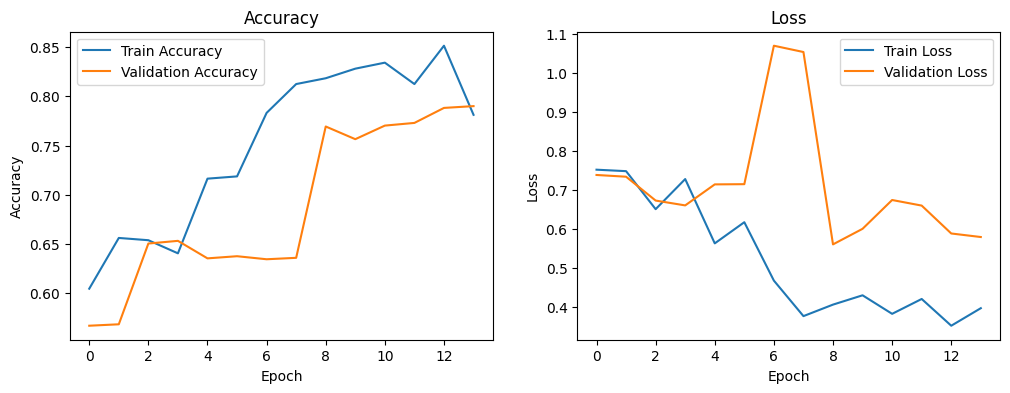

In [18]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show();

In [19]:
y_pred_probs = model.predict(X_test).ravel()

173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


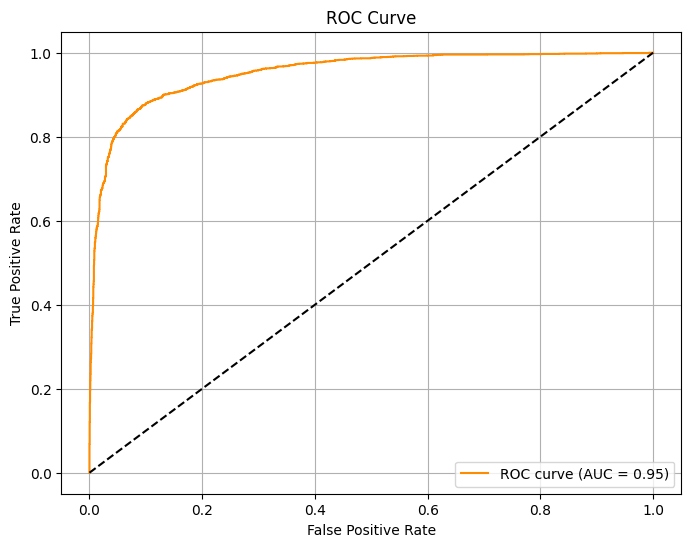

In [20]:
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show();

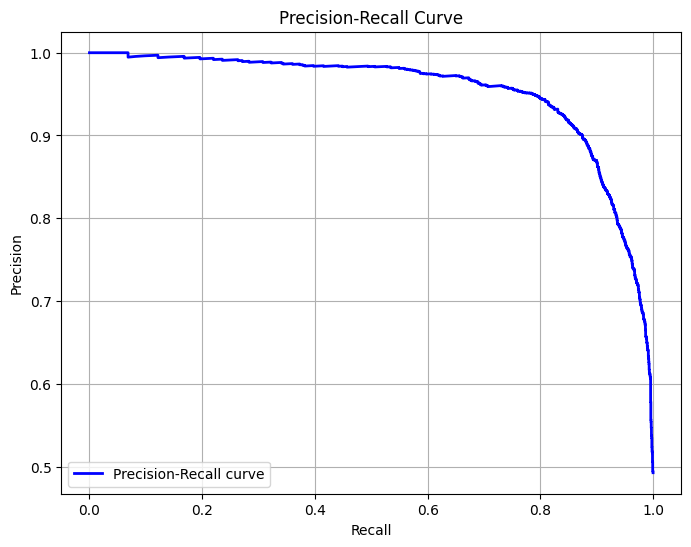

In [21]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve', color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show();

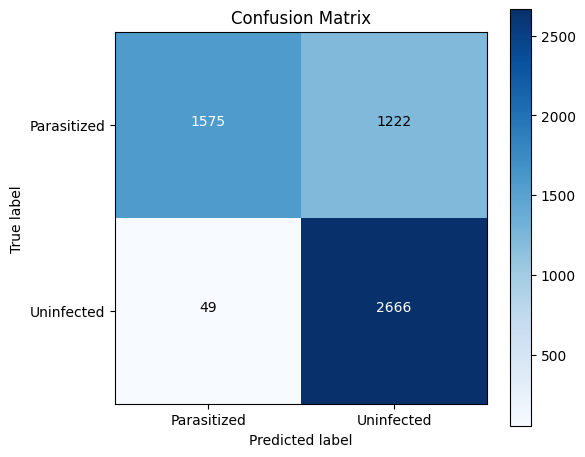

In [22]:
y_pred = (y_pred_probs > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Parasitized', 'Uninfected'])
plt.yticks(tick_marks, ['Parasitized', 'Uninfected'])

thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show();

In [23]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.56      0.71      2797
           1       0.69      0.98      0.81      2715

    accuracy                           0.77      5512
   macro avg       0.83      0.77      0.76      5512
weighted avg       0.83      0.77      0.76      5512



## **Model Saving**

In [24]:
model.save('malaria_detection_model.keras')